## Supervised Learning Methods & Models 

In this section, I will be using various supervised learning models to predict what the counts of Lymes disease will be in each region in the year 2050 under the RCP 8.5 Climate Scenario. I will compare the accuracy of the trained models to determine the optimal model, and perform my final prediction with that model. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
df = pd.read_csv('../data/clean_data/state_data.csv')

In [3]:
df.columns

Index(['Year', 'Precipitation_avg', 'region', 'Min_temp_avg', 'Avg_temp',
       'State', 'Lyme_cases', 'Total_Land_Area', 'Tree_Cover_Loss',
       'species_richness', 'state_park_land_coverage', 'state_park_rank'],
      dtype='object')

Shape of X after preparation: (735, 10)
Number of missing values in X: 0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.094e+06, tolerance: 1.569e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.470e+06, tolerance: 1.291e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.578e+05, toler


Model Performance Metrics:

Linear Regression:
RMSE: 1098.9453
R2: 0.4208
CV_mean: 0.2891
CV_std: 0.0713

Ridge:
RMSE: 1097.8020
R2: 0.4220
CV_mean: 0.2908
CV_std: 0.0714

Lasso:
RMSE: 1097.6266
R2: 0.4222
CV_mean: 0.2907
CV_std: 0.0711

Elastic Net:
RMSE: 1104.6263
R2: 0.4148
CV_mean: 0.2877
CV_std: 0.0680

Random Forest:
RMSE: 999.1368
R2: 0.5212
CV_mean: 0.6643
CV_std: 0.0597

Gradient Boosting:
RMSE: 930.5029
R2: 0.5847
CV_mean: 0.7032
CV_std: 0.0518

AdaBoost:
RMSE: 1045.4474
R2: 0.4758
CV_mean: 0.6130
CV_std: 0.1379

KNN:
RMSE: 1215.0897
R2: 0.2919
CV_mean: 0.5789
CV_std: 0.1403

SVR (RBF):
RMSE: 1594.1920
R2: -0.2189
CV_mean: -0.1443
CV_std: 0.0383

Kernel Ridge:
RMSE: 917.6390
R2: 0.5961
CV_mean: 0.4922
CV_std: 0.0697

Predicted Lyme Disease Cases for 2050 by Region:

Linear Regression predictions:
southern: 8107 cases
eastern: 5124 cases
central: 12411 cases
western: 26892 cases

Ridge predictions:
southern: 7716 cases
eastern: 4703 cases
central: 12011 cases
western: 26128 c

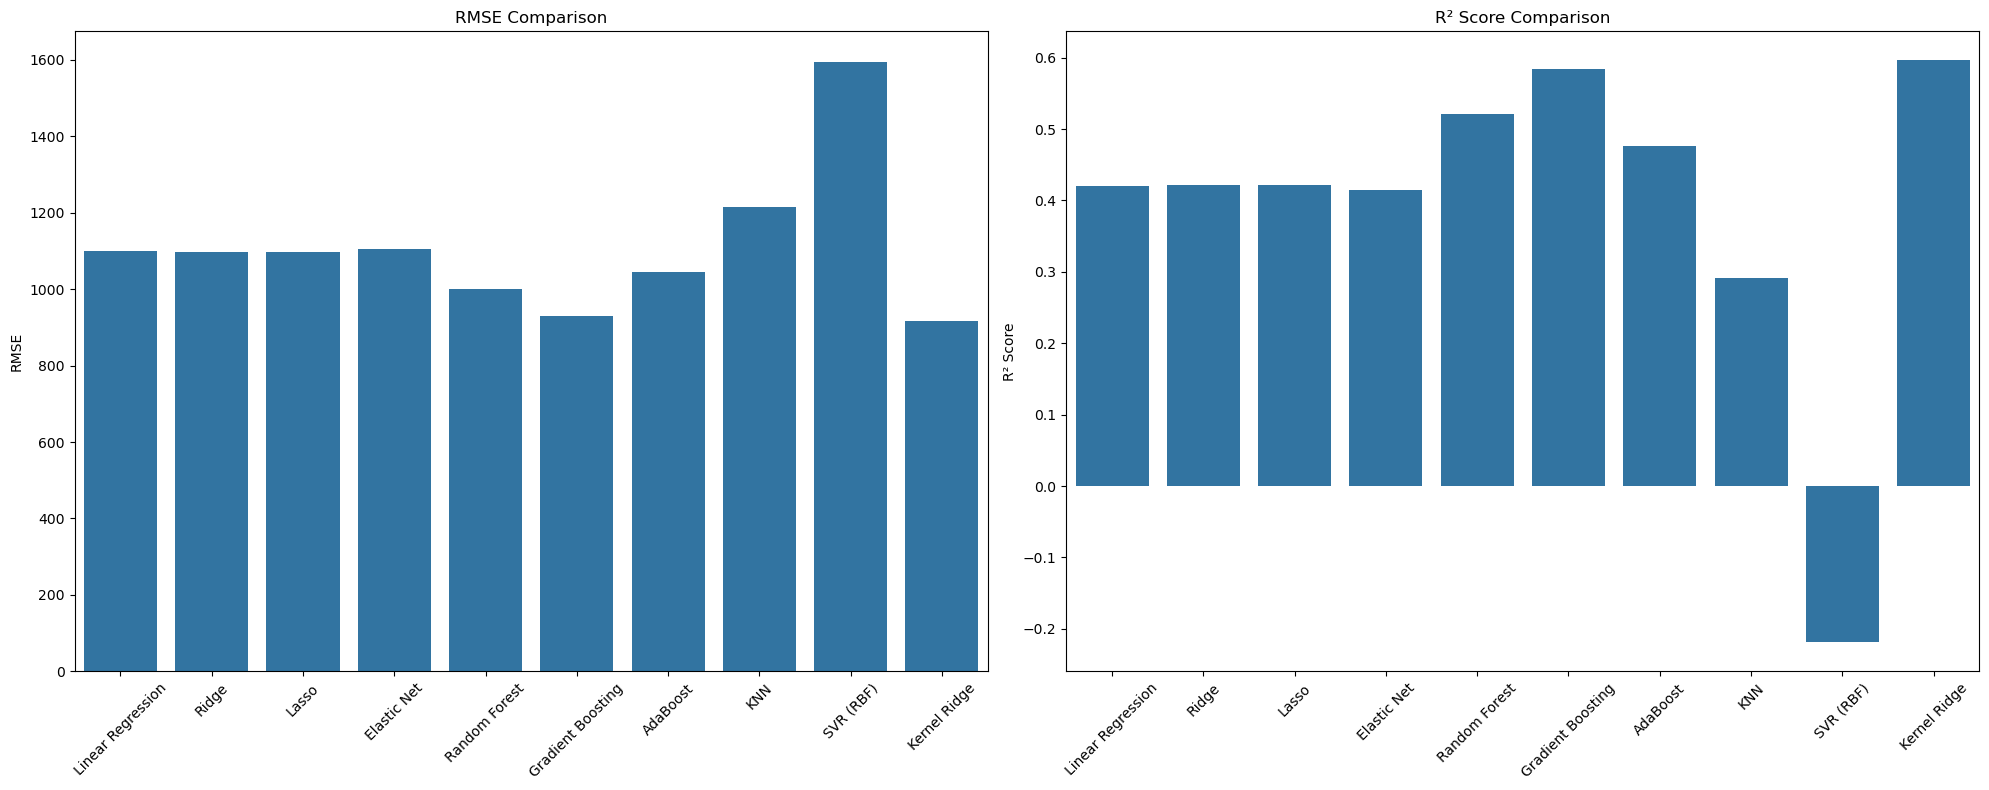

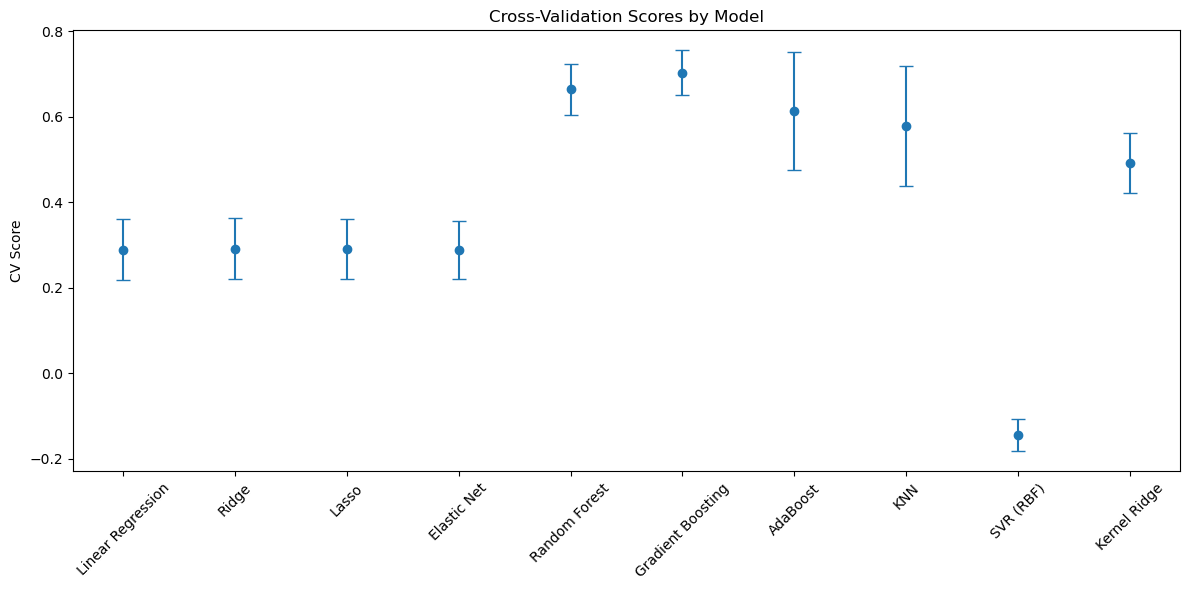

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from sklearn.neighbors import KNeighborsRegressor
# # from statsmodels import KernelReg
# from sklearn.svm import SVR
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt
# import seaborn as sns

# # [Previous data preparation functions remain the same]
# def train_and_evaluate_expanded_models(X, y):
#     # Split the data
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Scale the features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     # Initialize expanded set of models
#     models = {
#         'Linear Regression': LinearRegression(),
#         'Ridge': Ridge(alpha=1.0),
#         'Lasso': Lasso(alpha=1.0),
#         'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
#         'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
#         'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
#         'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
#         'KNN': KNeighborsRegressor(n_neighbors=5),
#         'SVR (RBF)': SVR(kernel='rbf'),
#         'Kernel Ridge': KernelRidge(kernel='rbf', alpha=1.0)
#     }
    
#     # Train and evaluate models
#     results = {}
#     trained_models = {}
    
#     for name, model in models.items():
#         try:
#             # Train model
#             model.fit(X_train_scaled, y_train)
            
#             # Make predictions
#             y_pred = model.predict(X_test_scaled)
            
#             # Calculate metrics
#             mse = mean_squared_error(y_test, y_pred)
#             rmse = np.sqrt(mse)
#             r2 = r2_score(y_test, y_pred)
            
#             # Perform cross-validation
#             cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
            
#             results[name] = {
#                 'RMSE': rmse,
#                 'R2': r2,
#                 'CV_mean': cv_scores.mean(),
#                 'CV_std': cv_scores.std()
#             }
#             trained_models[name] = model
            
#         except Exception as e:
#             print(f"Error training {name}: {str(e)}")
    
#     return results, trained_models, scaler

# def plot_expanded_model_comparison(results):
#     # Create figure with two subplots
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
#     # Prepare data for plotting
#     models = list(results.keys())
#     rmse_scores = [results[model]['RMSE'] for model in models]
#     r2_scores = [results[model]['R2'] for model in models]
    
#     # Plot RMSE comparison
#     sns.barplot(x=models, y=rmse_scores, ax=ax1)
#     ax1.set_title('RMSE Comparison')
#     ax1.set_ylabel('RMSE')
#     ax1.tick_params(axis='x', rotation=45)
    
#     # Plot R² comparison
#     sns.barplot(x=models, y=r2_scores, ax=ax2)
#     ax2.set_title('R² Score Comparison')
#     ax2.set_ylabel('R² Score')
#     ax2.tick_params(axis='x', rotation=45)
    
#     plt.tight_layout()
#     return fig

# def plot_cross_validation_results(results):
#     fig, ax = plt.subplots(figsize=(12, 6))
    
#     models = list(results.keys())
#     cv_means = [results[model]['CV_mean'] for model in models]
#     cv_stds = [results[model]['CV_std'] for model in models]
    
#     # Plot CV scores with error bars
#     ax.errorbar(models, cv_means, yerr=cv_stds, fmt='o', capsize=5)
#     ax.set_title('Cross-Validation Scores by Model')
#     ax.set_ylabel('CV Score')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
    
#     return fig

# # Main execution
# if __name__ == "__main__":
#     # Load and prepare data as before
#     hist_df = pd.read_csv('../data/clean_data/data.csv')
#     future_df = pd.read_csv('../data/clean_data/2050inputs.csv')
    
#     X, y, imputer = prepare_training_data(hist_df)
    
#     # Train and evaluate expanded set of models
#     results, trained_models, scaler = train_and_evaluate_expanded_models(X, y)
    
#     # Print detailed results
#     print("\nModel Performance Metrics:")
#     for model_name, metrics in results.items():
#         print(f"\n{model_name}:")
#         for metric_name, value in metrics.items():
#             print(f"{metric_name}: {value:.4f}")
    
#     # Plot comparisons
#     comparison_fig = plot_expanded_model_comparison(results)
#     cv_fig = plot_cross_validation_results(results)
    
#     # Prepare and predict with 2050 data
#     future_X = prepare_future_data(future_df, X.columns, imputer)
#     future_X_scaled = scaler.transform(future_X)
    
#     # Make predictions for 2050
#     print("\nPredicted Lyme Disease Cases for 2050 by Region:")
#     for model_name, model in trained_models.items():
#         predictions = model.predict(future_X_scaled)
#         print(f"\n{model_name} predictions:")
#         for region, pred in zip(future_df['region'].unique(), predictions):
#             print(f"{region}: {max(0, int(pred))} cases")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.669e+08, tolerance: 4.664e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.936e+08, tolerance: 4.097e+05
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+08, toler


Model Performance Metrics:

Linear Regression:
RMSE: 13193.5047
R2: 0.2034
CV_mean: -1.9780
CV_std: 4.7710

Ridge:
RMSE: 13828.9896
R2: 0.1248
CV_mean: -1.7961
CV_std: 4.4142

Lasso:
RMSE: 13196.3360
R2: 0.2031
CV_mean: -1.9773
CV_std: 4.7696

Elastic Net:
RMSE: 14920.5822
R2: -0.0188
CV_mean: -1.7692
CV_std: 4.2954

Random Forest:
RMSE: 15688.5246
R2: -0.1263
CV_mean: -2.7416
CV_std: 6.3142

Gradient Boosting:
RMSE: 14154.4208
R2: 0.0832
CV_mean: -2.8042
CV_std: 6.5367

AdaBoost:
RMSE: 13135.8624
R2: 0.2104
CV_mean: -2.6144
CV_std: 6.0407

KNN:
RMSE: 13482.0351
R2: 0.1682
CV_mean: -0.3996
CV_std: 1.6839

SVR (RBF):
RMSE: 19749.3396
R2: -0.7849
CV_mean: -0.4023
CV_std: 0.3486

Kernel Ridge:
RMSE: 11600.3679
R2: 0.3842
CV_mean: -0.3517
CV_std: 1.9149

Predicted Lyme Disease Cases for 2050 by Region:

Linear Regression predictions:
central: 15265 cases
eastern: 20909 cases
southern: 13353 cases
western: 0 cases

Ridge predictions:
central: 26033 cases
eastern: 31159 cases
southern: 2408

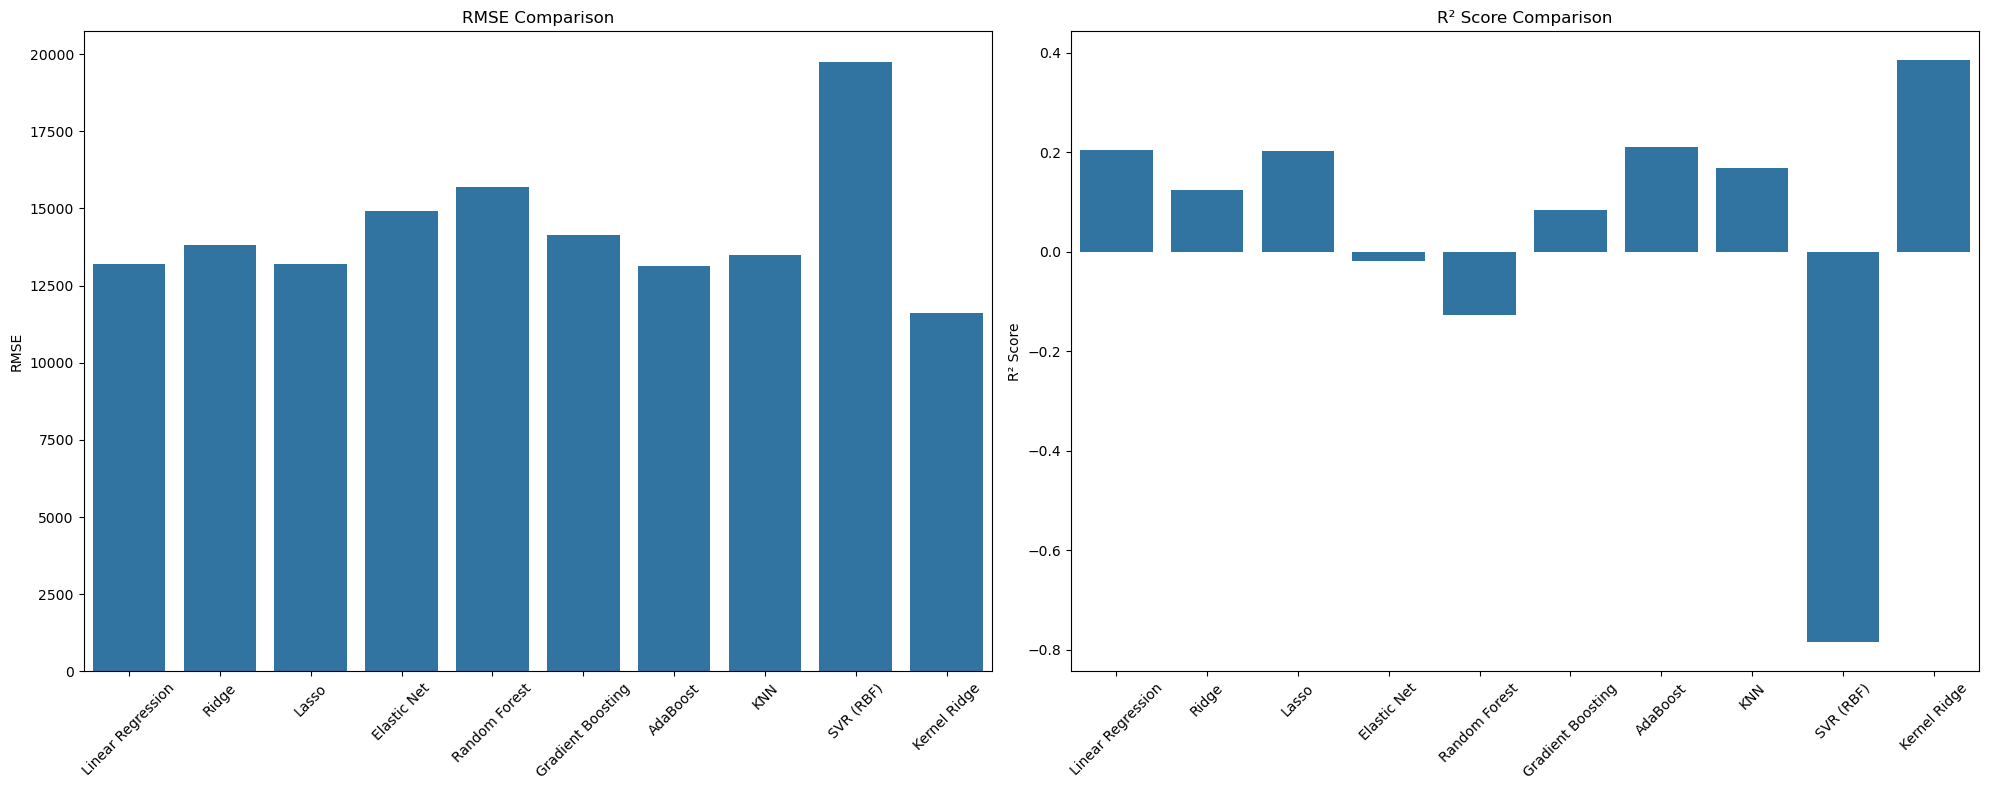

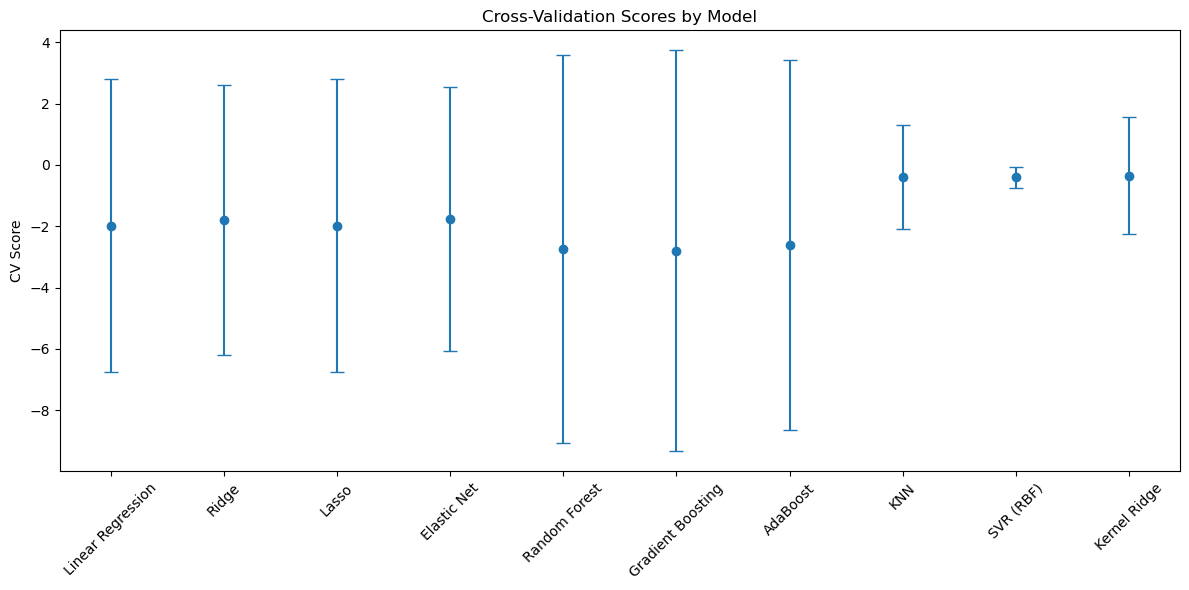

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_training_data(df):
    df_agg = df.groupby(['Year', 'region', 'Precipitation_avg', 'Min_temp_avg', 'Avg_temp'])['Lyme_cases'].sum().reset_index()
    X = df_agg[['Min_temp_avg', 'Avg_temp', 'Precipitation_avg']]
    y = df_agg['Lyme_cases']
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    return X, y, imputer

def prepare_future_data(future_df, imputer):
    future_wide = future_df.pivot(index='region', columns='Indicator', values='value')
    X_future = future_wide[['Min_temp', 'Avg_temp', 'Precipitation_avg']].values
    return X_future, future_wide.index
    
    # X_future = future_wide[['Min_temp_avg', 'Avg_temp', 'Precipitation_avg']]
    # X_future = imputer.transform(X_future)
    # return X_future, future_wide['region']

def train_and_evaluate_expanded_models(X, y):
   # Split the data
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
   # Scale the features
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   
   # Initialize expanded set of models
   models = {
       'Linear Regression': LinearRegression(),
       'Ridge': Ridge(alpha=0.1),
       'Lasso': Lasso(alpha=0.1),
       'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
       'Random Forest': RandomForestRegressor(n_estimators=200, min_samples_leaf=2),
       'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1),
       'AdaBoost': AdaBoostRegressor(n_estimators=200),
       'KNN': KNeighborsRegressor(n_neighbors=3),
       'SVR (RBF)': SVR(kernel='rbf', C=10),
       'Kernel Ridge': KernelRidge(kernel='rbf', alpha=0.1)
   }
   
   # Train and evaluate models
   results = {}
   trained_models = {}
   
   for name, model in models.items():
       try:
           # Train model
           model.fit(X_train_scaled, y_train)
           
           # Make predictions
           y_pred = model.predict(X_test_scaled)
           
           # Calculate metrics
           mse = mean_squared_error(y_test, y_pred)
           rmse = np.sqrt(mse)
           r2 = r2_score(y_test, y_pred)
           
           # Perform cross-validation
           cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
           
           results[name] = {
               'RMSE': rmse,
               'R2': r2,
               'CV_mean': cv_scores.mean(),
               'CV_std': cv_scores.std()
           }
           trained_models[name] = model
           
       except Exception as e:
           print(f"Error training {name}: {str(e)}")
   
   return results, trained_models, scaler

def plot_expanded_model_comparison(results):
   # Create figure with two subplots
   fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
   
   # Prepare data for plotting
   models = list(results.keys())
   rmse_scores = [results[model]['RMSE'] for model in models]
   r2_scores = [results[model]['R2'] for model in models]
   
   # Plot RMSE comparison
   sns.barplot(x=models, y=rmse_scores, ax=ax1)
   ax1.set_title('RMSE Comparison')
   ax1.set_ylabel('RMSE')
   ax1.tick_params(axis='x', rotation=45)
   
   # Plot R² comparison
   sns.barplot(x=models, y=r2_scores, ax=ax2)
   ax2.set_title('R² Score Comparison')
   ax2.set_ylabel('R² Score')
   ax2.tick_params(axis='x', rotation=45)
   
   plt.tight_layout()
   return fig

def plot_cross_validation_results(results):
   fig, ax = plt.subplots(figsize=(12, 6))
   
   models = list(results.keys())
   cv_means = [results[model]['CV_mean'] for model in models]
   cv_stds = [results[model]['CV_std'] for model in models]
   
   # Plot CV scores with error bars
   ax.errorbar(models, cv_means, yerr=cv_stds, fmt='o', capsize=5)
   ax.set_title('Cross-Validation Scores by Model')
   ax.set_ylabel('CV Score')
   plt.xticks(rotation=45)
   plt.tight_layout()
   
   return fig

# Main execution
if __name__ == "__main__":
   # Load and prepare data
   hist_df = pd.read_csv('../data/clean_data/data.csv')
   future_df = pd.read_csv('../data/clean_data/2050inputs.csv')
   
   X, y, imputer = prepare_training_data(hist_df)
   
   # Train and evaluate expanded set of models
   results, trained_models, scaler = train_and_evaluate_expanded_models(X, y)
   
   # Print detailed results
   print("\nModel Performance Metrics:")
   for model_name, metrics in results.items():
       print(f"\n{model_name}:")
       for metric_name, value in metrics.items():
           print(f"{metric_name}: {value:.4f}")
   
   # Plot comparisons
   comparison_fig = plot_expanded_model_comparison(results)
   cv_fig = plot_cross_validation_results(results)
   
   # Prepare and predict with 2050 data
   future_X, future_regions = prepare_future_data(future_df, imputer)
   future_X_scaled = scaler.transform(future_X)

# Make predictions for 2050
print("\nPredicted Lyme Disease Cases for 2050 by Region:")
for model_name, model in trained_models.items():
    predictions = model.predict(future_X_scaled)
    print(f"\n{model_name} predictions:")
    for region, pred in zip(future_regions, predictions):
        print(f"{region}: {max(0, int(pred))} cases")

please also remember that I would like to keep the static variables 'state_park_land_coverage', 'state_park_rank', 'Total_Land_Area' in the model as well. For the year 2022 in the existing dataset, take the Sum total of 'Total_Land_Area'  per region (so add the land area of all states in that region) and the averages of 'state_park_land_coverage', 'state_park_rank' among the states for each of the 4 regions. 